# Python 第三方库

Python 第三方库可以使用 pip 安装：
```bash
pip install numpy matplotlib
```
如果因为网络原因安装太慢，可以更换软件源
```bash
pip config set global.index-url https://mirrors.pku.edu.cn/pypi/web/simple
```

# NumPy 基本操作

NumPy，全名为 "Numerical Python"，是Python中用于科学计算和数据分析的重要库之一。它提供了强大的多维数组对象和用于处理这些数组的函数。

- **高性能计算：** NumPy 的底层实现是用C语言编写的，这使得它在处理大型数据集时非常高效。NumPy 中的矢量化操作允许您在不使用显式循环的情况下进行数组操作，从而提高了计算速度。
- **广泛的数学函数：** NumPy 提供了许多内置的数学函数，包括数学运算、统计和线性代数运算等。这使得它成为进行科学计算的理想工具。
- **数据结构：** NumPy 引入了多维数组对象（`numpy.ndarray`），这些数组能够容纳同一数据类型的元素。这对于处理大规模数据集非常重要，因为它确保了数据的一致性和效率。

尽管可以直接 `import numpy` 再通过 `numpy.array` 调用，但习惯上我们会通过 `import numpy as np` 再通过 `np.array` 调用。

In [2]:
import numpy as np

NumPy 最新的版本是 `2.x`，少部分 `1.x` 的代码无法直接运行。请根据实际情况选择合适的版本

In [2]:
np.__version__

'2.1.1'

In [4]:
example_arr = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]], dtype=float)
example_arr

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]])

每个数组都有形状

In [5]:
example_arr.shape

(3, 3)

可以改变数组的形状，其中 `-1` 表示自动推断形状

In [6]:
np.reshape(example_arr, (-1,))

array([1., 2., 3., 4., 5., 6., 7., 8., 9.])

访问数组有各种方法

In [6]:
example_arr[0, 0], example_arr[:1, :], example_arr[0:1, :, np.newaxis]

(np.float64(1.0),
 array([[1., 2., 3.]]),
 array([[[1.],
         [2.],
         [3.]]]))

有很多其他生成数组的方式：

In [7]:
arr_a = np.arange(3)
arr_b = np.linspace(5, 9, 3)
arr_a, arr_b

(array([0, 1, 2]), array([5., 7., 9.]))

数组的操作要搭配 NumPy 的数学函数

In [8]:
np.sin(arr_a)

array([0.        , 0.84147098, 0.90929743])

数组之间的运算是逐元素进行的

In [9]:
arr_a + arr_b

array([ 5.,  8., 11.])

NumPy 的广播机制（Broadcast）可以让一些形状不完全一样的数组进行计算。最简单的广播：

In [10]:
arr_a * 2

array([0, 2, 4])

![Broadcast](https://numpy.org/doc/stable/_images/broadcasting_1.png)

更复杂一些的例子

```
A      (4d array):  8 x 1 x 6 x 1
B      (3d array):      7 x 1 x 5
Result (4d array):  8 x 7 x 6 x 5

```
对于每一对维度，必须满足以下两个条件之一，广播才能成功：
* 两个维度的大小相等。
* 其中一个维度的大小为 1。

# Matplotlib 基本操作

Matplotlib 是 Python 生态系统的一个重要组成部分，是用于可视化的绘图库，可以生成出版质量级别的精美图形，Matplotlib 使绘图变得非常简单，在易用性和性能间取得了优异的平衡。

## 中文字体
由于中文字体的混乱现状（Window, macOS, Linux 上能直接使用的字体都是不同的），Matplotlib 的图例、标题、坐标轴中默认无法使用中文。下面的代码可以用来查看本机支持什么字体：

In [8]:
from matplotlib.font_manager import FontManager

print(", ".join(sorted(set(f.name for f in FontManager().ttflist))))

Agency FB, Algerian, Arial, Arial Rounded MT Bold, Bahnschrift, Baskerville Old Face, Bauhaus 93, Bell MT, Berlin Sans FB, Berlin Sans FB Demi, Bernard MT Condensed, Blackadder ITC, Bodoni MT, Book Antiqua, Bookman Old Style, Bookshelf Symbol 7, Bradley Hand ITC, Britannic Bold, Broadway, Brush Script MT, Calibri, Californian FB, Calisto MT, Cambria, Candara, Castellar, Centaur, Century, Century Gothic, Century Schoolbook, Chiller, Colonna MT, Comic Sans MS, Consolas, Constantia, Cooper Black, Copperplate Gothic Bold, Copperplate Gothic Light, Corbel, Courier New, Curlz MT, DejaVu Sans, DejaVu Sans Display, DejaVu Sans Mono, DejaVu Serif, DejaVu Serif Display, DengXian, Dubai, Ebrima, Edwardian Script ITC, Elephant, Engravers MT, Eras Bold ITC, Eras Demi ITC, Eras Light ITC, Eras Medium ITC, Euclid, Euclid Extra, Euclid Fraktur, Euclid Math One, Euclid Math Two, Euclid Symbol, FZOuYangXunKaiShuS, FZQiGongXingKaiJF, FZQiGongXingKaiS, FZShuTi, FZYaoTi, FZZJ-THCTJW, FZZJ-XHFTJF, FZZJ-YLKS

有些字体无法被 Matplotlib 检测到，如一部分 [`.ttc` 文件](https://github.com/matplotlib/matplotlib/issues/3135)。如果某字体无法被找到或使用，可尝试清除缓存后重试，或重启 Kernel 重新运行代码：

In [12]:
import shutil

import matplotlib

shutil.rmtree(matplotlib.get_cachedir(), ignore_errors=True)

In [9]:
import matplotlib.pyplot as plt

# Replace `SimHei` with Chinese fonts on your computer 
plt.rcParams["font.family"] = ["sans-serif", "SimHei"]
# You may find this line on CSDN, but it's optional here
# plt.rcParams["axes.unicode_minus"] = False

## `plt` 与 `ax` 接口
下面是一个简单的例子。想提醒大家的是<b style="color: firebrick">一定要记得标坐标轴和图例！</b>

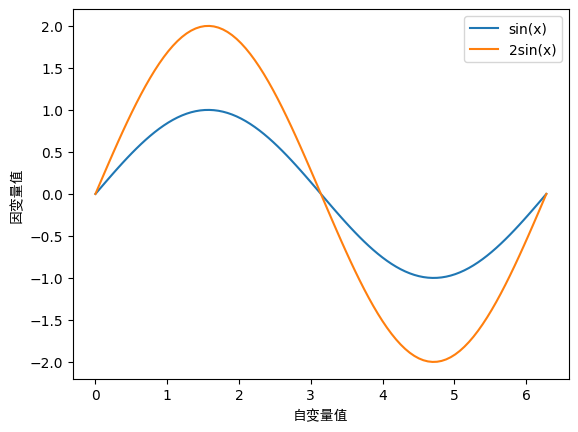

In [5]:
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)
plt.plot(x, y, label="sin(x)")
plt.plot(x, 2 * y, label="2sin(x)")
plt.xlabel("自变量值")
plt.ylabel("因变量值")
plt.legend()
plt.show()

Matplotlib 画图有两种风格的接口：
- `plt` (`pyplot`) 接口是简化版的接口，它会自动新建图（Figure）和坐标轴（Axes）
- `ax` (`Axes`) 接口是功能更全的接口，可以对图进行更多的设置，如多个子图

这两种接口的调用方法会有一些不同。建议使用 `Axes` 接口。

另外，如果图例会盖住曲线，应该适当调整 Y 轴的区间。
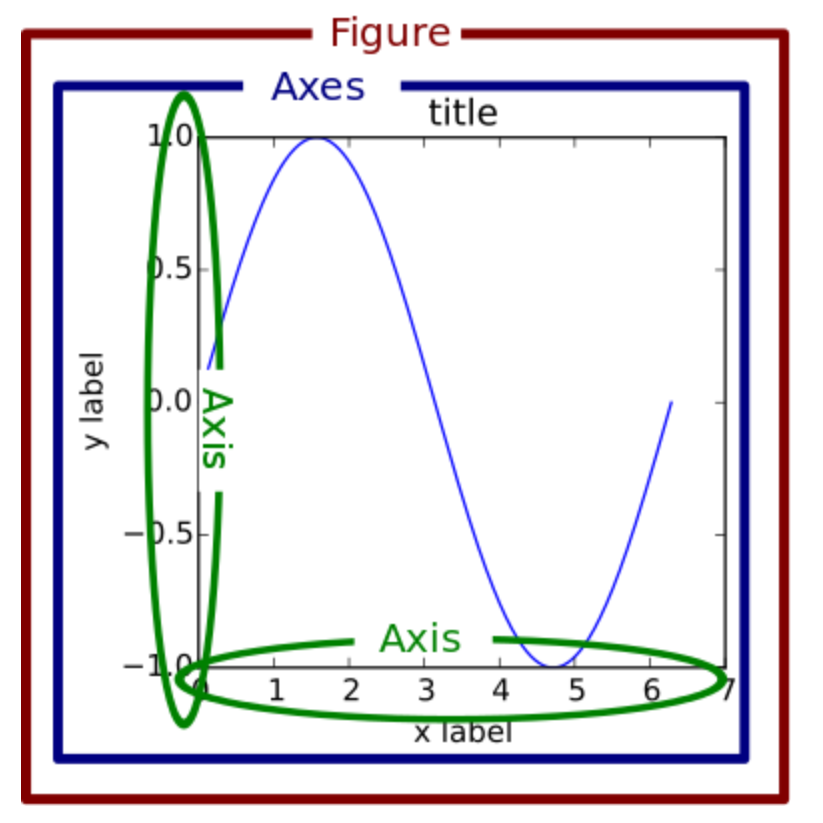


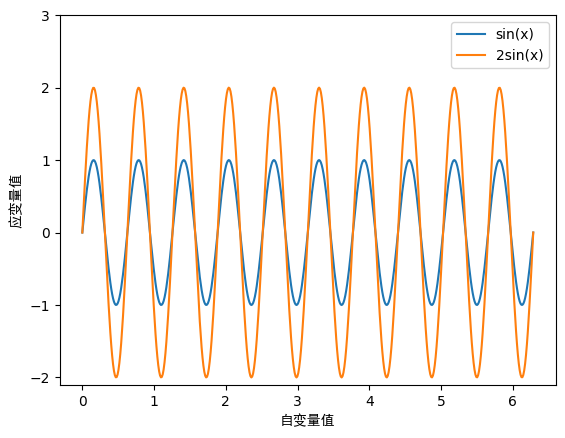

In [15]:
x = np.linspace(0, 2 * np.pi, 500)
y = np.sin(10 * x)
fig, ax = plt.subplots()
ax.plot(x, y, label="sin(x)")
ax.plot(x, 2 * y, label="2sin(x)")
ax.set_xlabel("自变量值")
ax.set_ylabel("应变量值")
ax.set_ylim(-2.1, 3)
ax.legend()
fig.show()

## 子图（subplots）
- 可以使用 `subplots` 创建子图网格
    - 图的大小也应该根据子图的数量条件
    - **不要**在一张图里放过多的子图！
    - 如果需要高清大图，可以把 DPI 调大
- Matplotlib 可以画各种各样的图
    - 可以设置线条的粗细和颜色、marker 的大小和颜色
    - 条形图的粗细、error bar 的大小
- 可以使用 `savefig` 方法来保存图片（PNG、JPG、PDF……）
- [Constrained layout](https://matplotlib.org/stable/users/explain/axes/constrainedlayout_guide.html) 会自动调整子绘图，使刻度标签、图例等不会重叠，同时还能保留用户要求的逻辑布局。如果它不好用，也可尝试一下 [tight layout](https://matplotlib.org/stable/users/explain/axes/tight_layout_guide.html)，但一般来说 constrained layout 会更好。
- `for ax in axes.flatten()` 可以方便地对所有子图做相同的操作

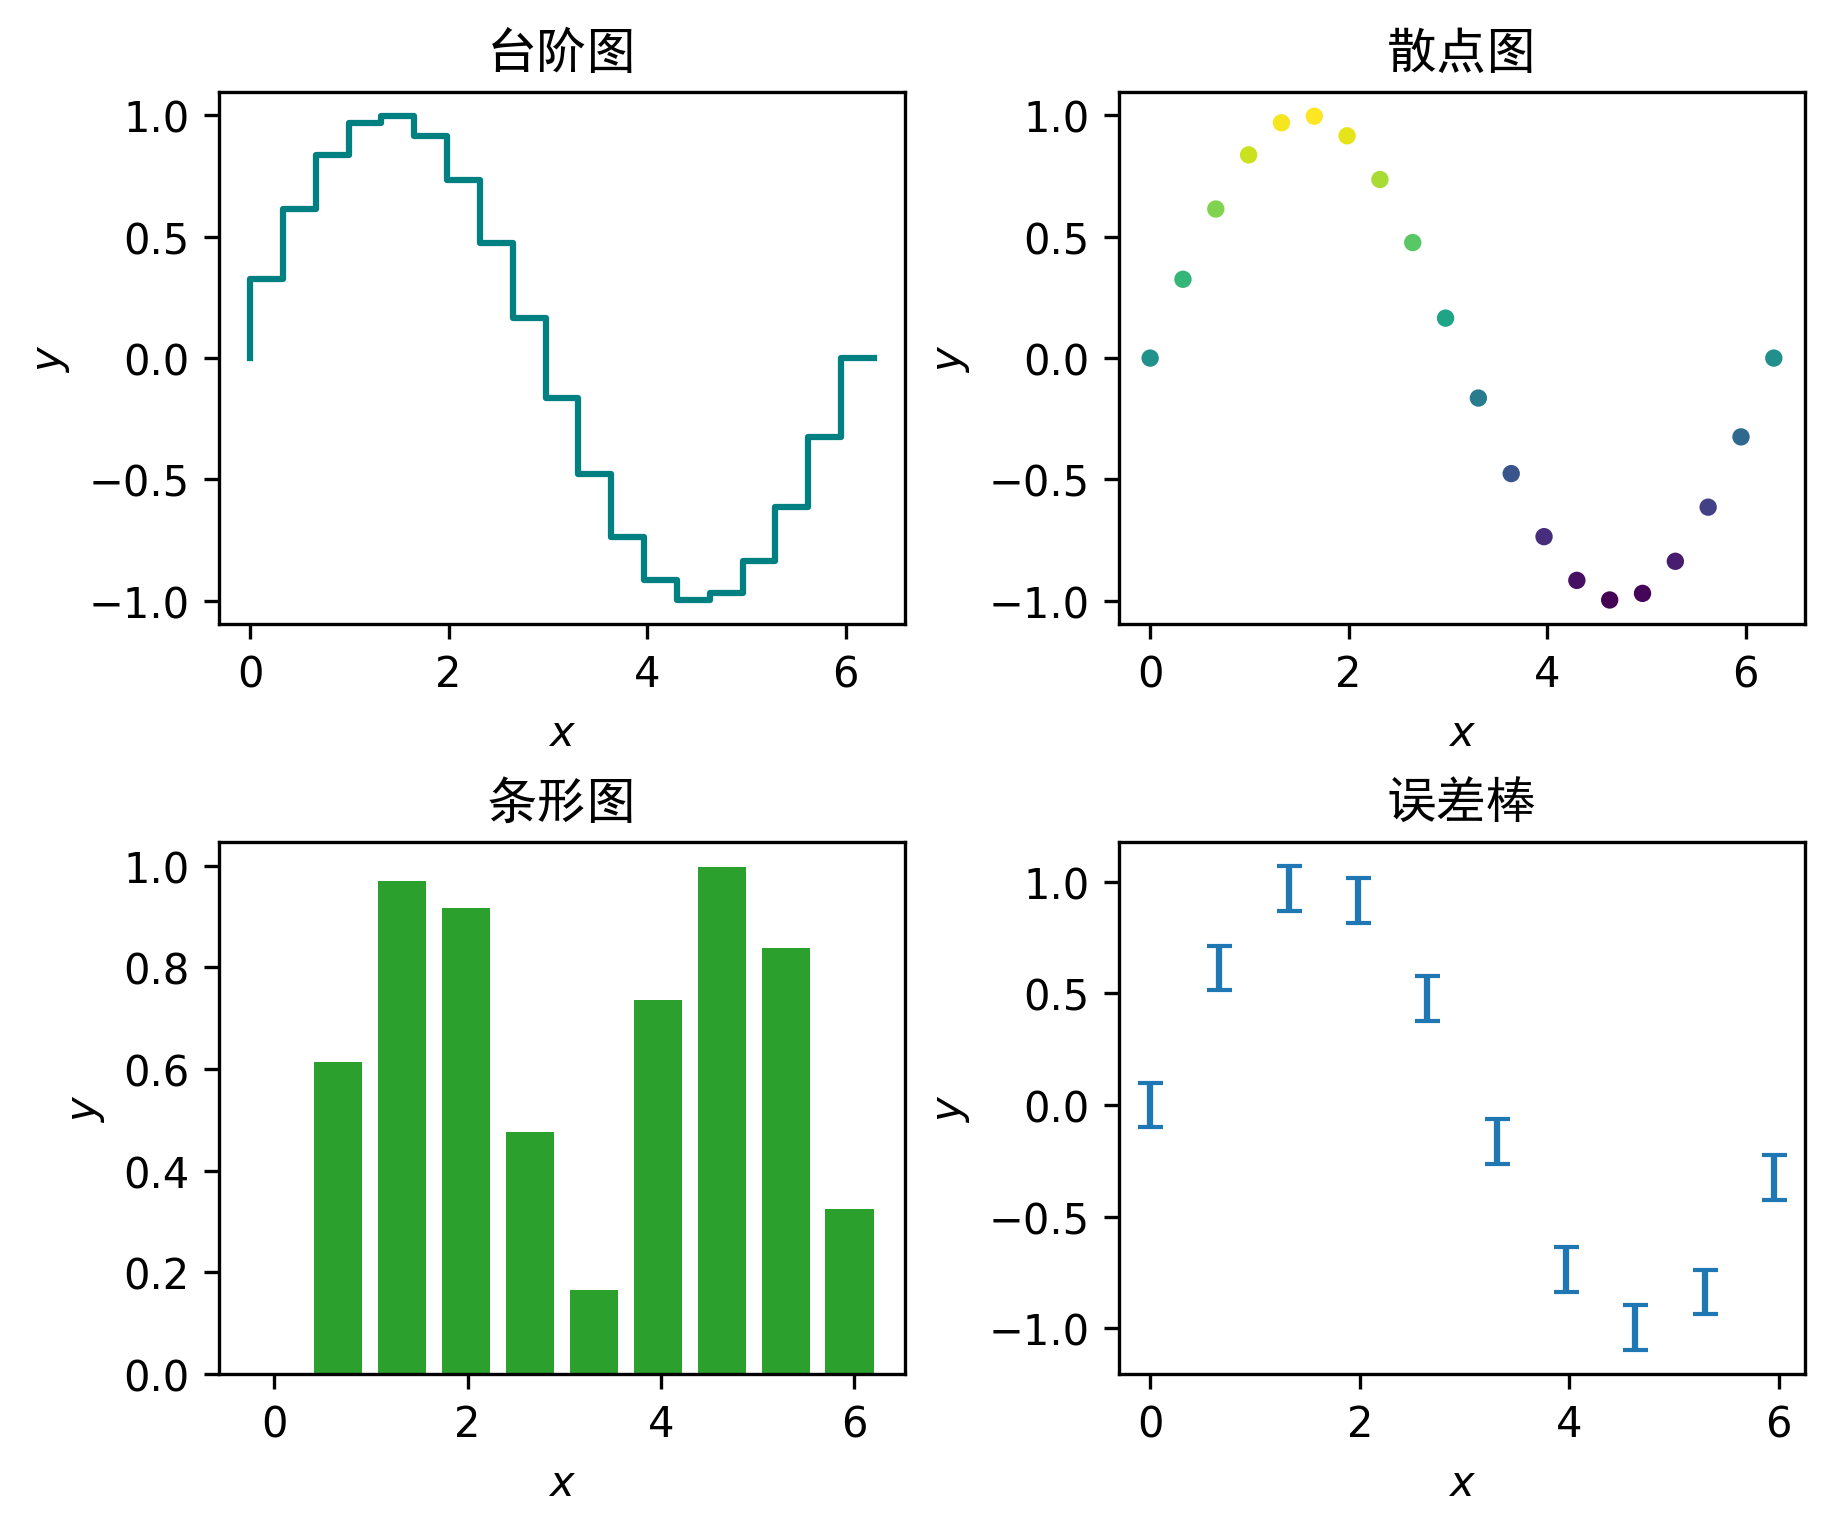

In [16]:
x = np.linspace(0, 2 * np.pi, 20)
y = np.sin(x)

fig, axes = plt.subplots(
    nrows=2, ncols=2, figsize=(6, 5), layout="constrained", dpi=300
)

axes[0, 0].step(x, y, c="teal")
axes[0, 0].set_title("台阶图")

axes[0, 1].scatter(x, y, s=10, c=y)
axes[0, 1].set_title("散点图")

axes[1, 0].bar(x[::2], np.abs(y[::2]), width=0.5, color="C2")
axes[1, 0].set_title("条形图")

axes[1, 1].errorbar(x[::2], y[::2], ls="", yerr=0.1, capsize=3)
axes[1, 1].set_title("误差棒")

for ax in axes.flatten():
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")

fig.savefig("mpl-showcase.pdf")
fig.show()

更复杂的例子：
- 共享 Y 轴
- 共用图例
- 调节子图间距和大小

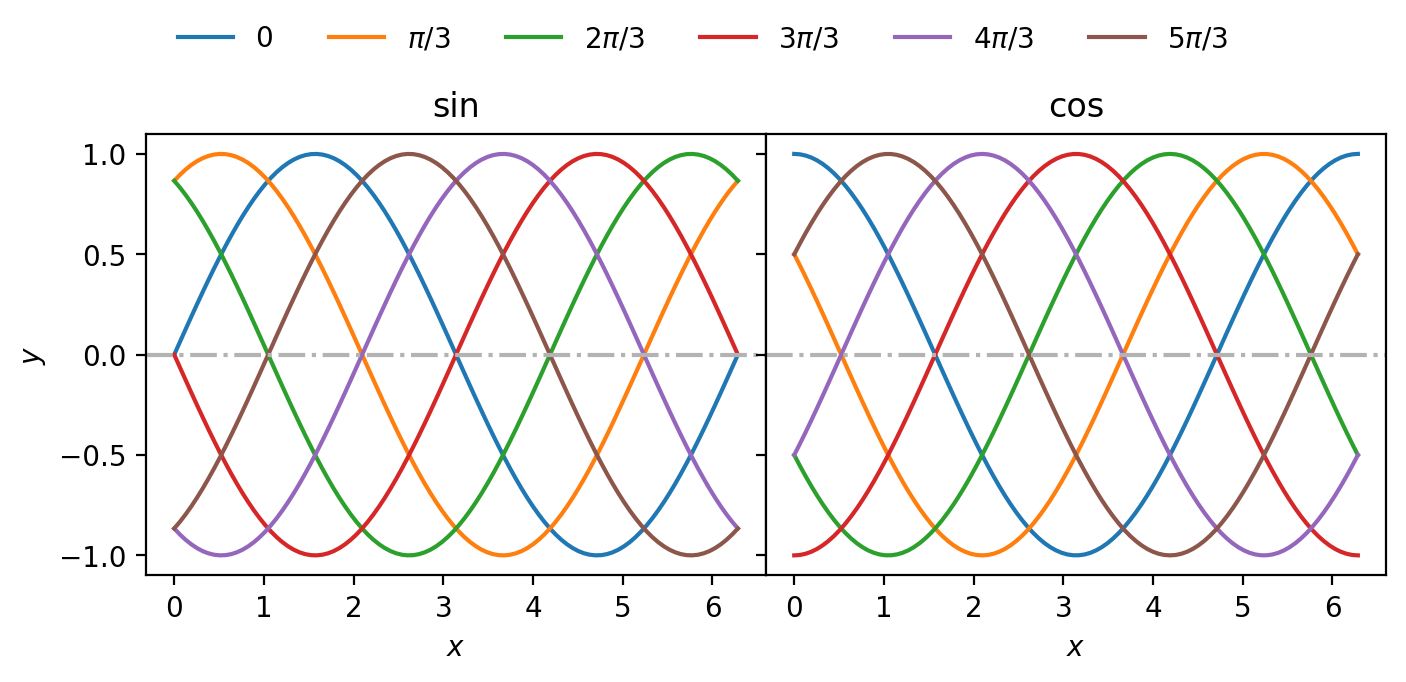

In [17]:
x = np.linspace(0, 2 * np.pi, 100)
offsets = {"$0$": 0, r"$\pi/3$": np.pi / 3} | {
    rf"${n}\pi/3$": n * np.pi / 3 for n in range(2, 6)
}
fig, (ax1, ax2) = plt.subplots(
    nrows=1,
    ncols=2,
    sharey=True,#
    figsize=(8, 3.2),
    dpi=200,
    gridspec_kw={"wspace": 0, "top": 0.8},
)
for label, offset in offsets.items():
    ax1.plot(x, np.sin(x + offset), label=label)
    ax2.plot(x, np.cos(x + offset), label=label)

ax1.set_title("sin")
ax1.set_ylabel("$y$")
ax2.set_title("cos")

for ax in fig.axes:
    ax.set_xlabel("$x$")
    ax.axhline(0, ls="-.", color="0.7")
fig.legend(
    handles=ax1.get_legend_handles_labels()[0],
    ncols=6,
    loc="upper center",
    frameon=False,
)

## 二维图
在创建二维图中，`np.meshgrid` 是个常用的函数。它可以让我们方便地通过一维的 `x` 和 `y` 数组创建一个二维的 `z` 数组。回忆一下，NumPy 中的数学操作都是逐元素进行的，把 `x` 和 `y` 变成二维的 `xx` 和 `yy` 可以方便的计算 `z`.

C:\Users\12538\AppData\Local\Temp\ipykernel_46088\942872187.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


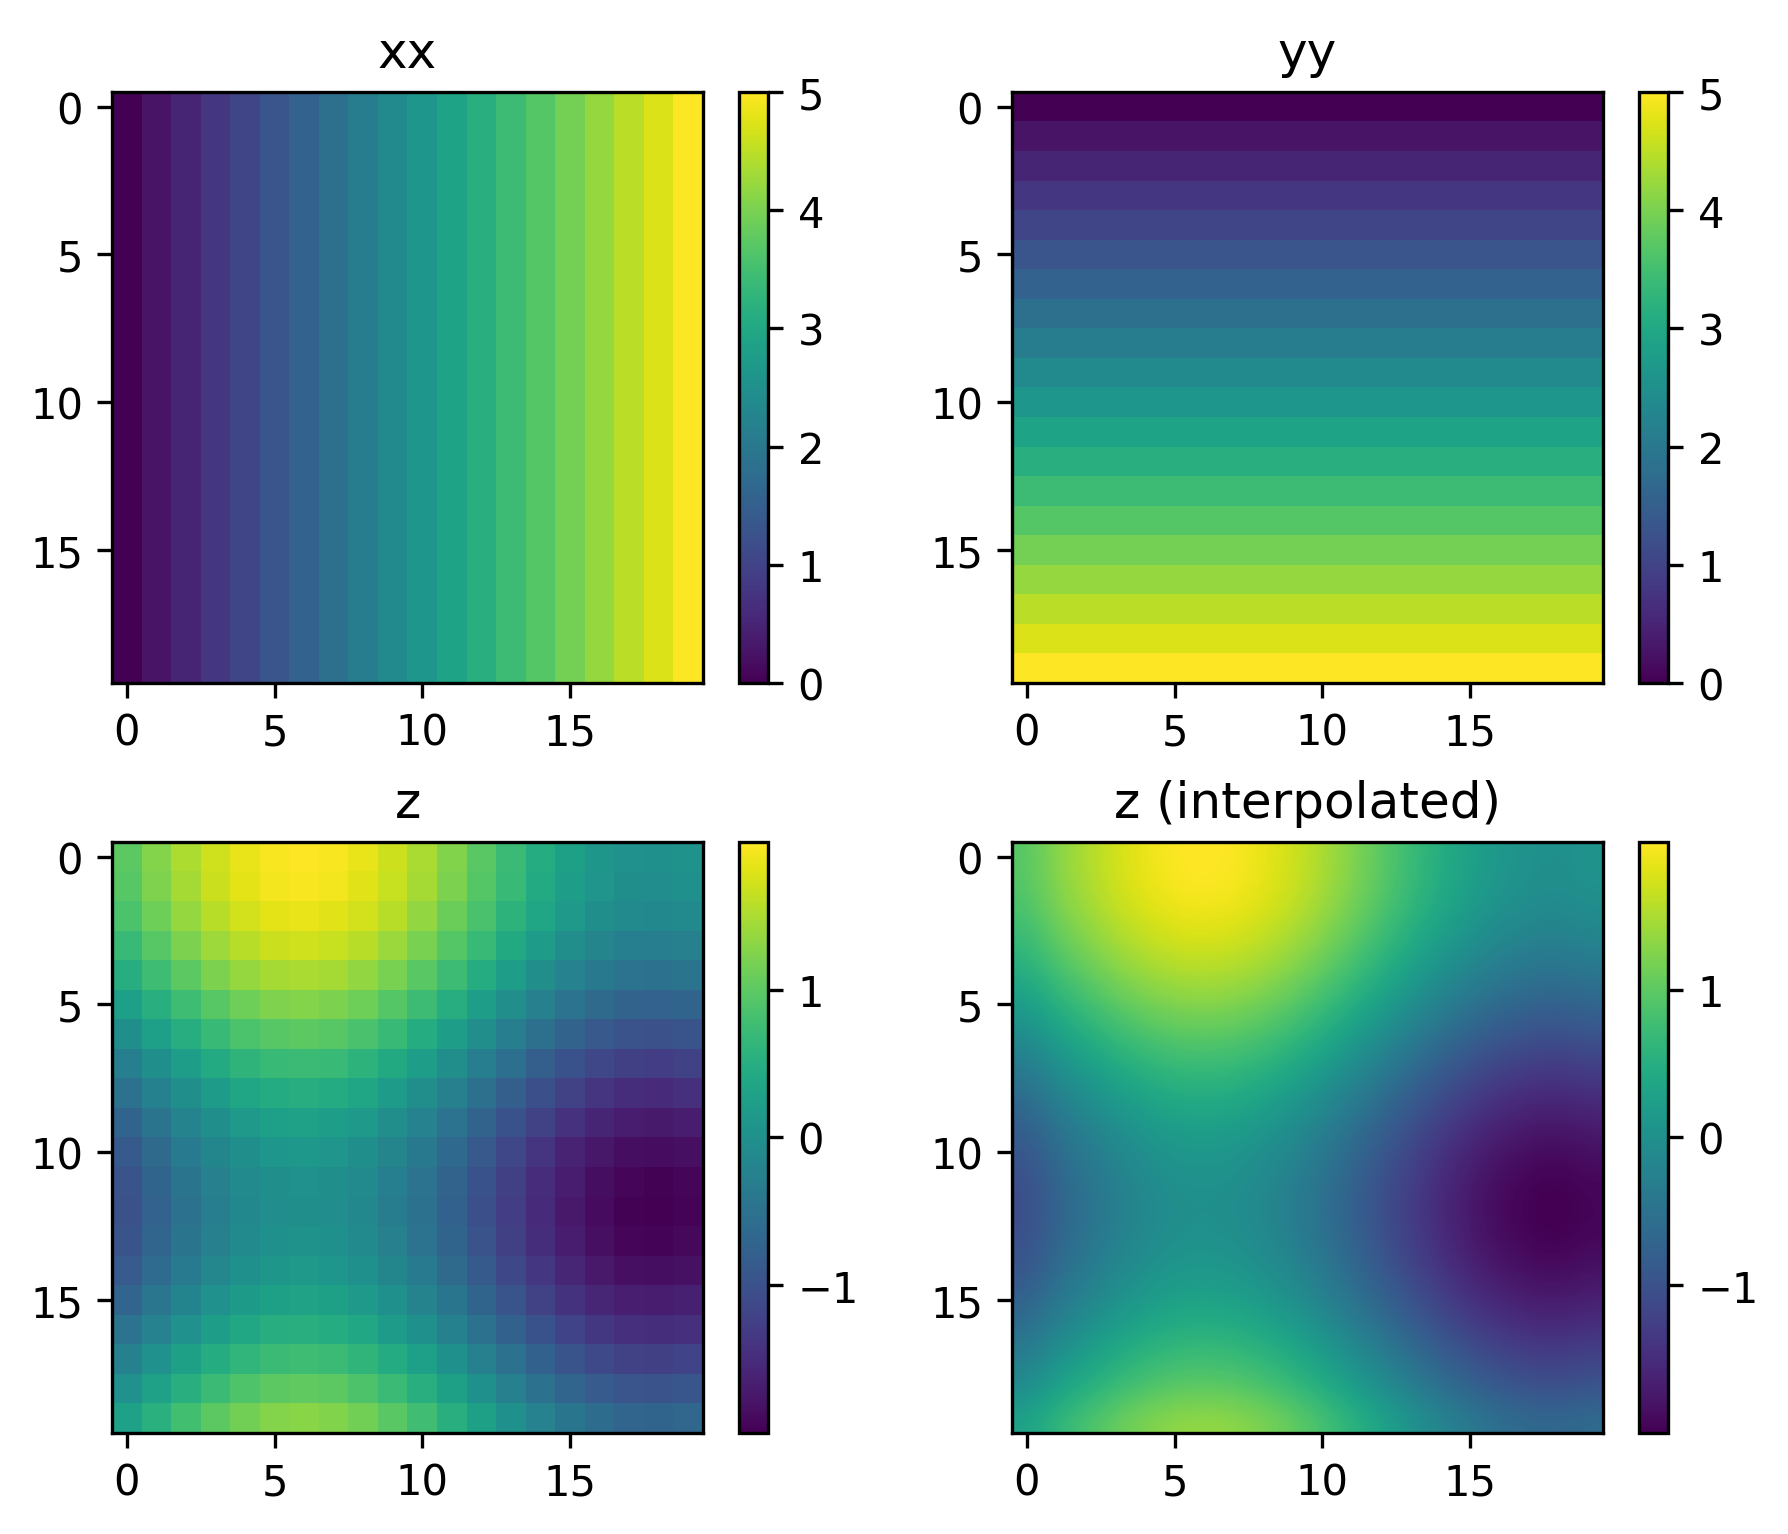

In [13]:
fig, axes = plt.subplots(
    nrows=2, ncols=2, figsize=(6, 5), layout="constrained", dpi=300
)

x = y = np.linspace(0, 5, 20)
xx, yy = np.meshgrid(x, y)
z = np.sin(xx) + np.cos(yy)

color_xx = axes[0, 0].imshow(xx)
fig.colorbar(color_xx, ax=axes[0, 0])
axes[0, 0].set_title("xx")

color_yy = axes[0, 1].imshow(yy)
fig.colorbar(color_yy, ax=axes[0, 1])
axes[0, 1].set_title("yy")

color_z = axes[1, 0].imshow(z)
fig.colorbar(color_z, ax=axes[1, 0])
axes[1, 0].set_title("z")

color_z1 = axes[1, 1].imshow(z, interpolation="lanczos")
fig.colorbar(color_z1, ax=axes[1, 1])
axes[1, 1].set_title("z (interpolated)")

fig.show()

## 三维图

在绘制三维图时， 需要使用 `projection='3d'` 创建一个三维的 `Axes`. 其余操作和二维图的操作是类似的。

除了 `viridis` 以外，colormap 还有很多，可以参考 https://matplotlib.org/stable/users/explain/colors/colormaps.html#sequential

以及，如果需要可交互的三维图，`ipympl` 库可以做到：
```bash
pip install ipympl
```
记得使用魔法语句 `%matplotlib ipympl` 来启用交互模式。但注意，<b style="color: firebrick">交互模式仅适用与调试，正式的答案不要使用交互模式！</b>

交互模式用完了可以用 `%matplotlib inline` 关闭。

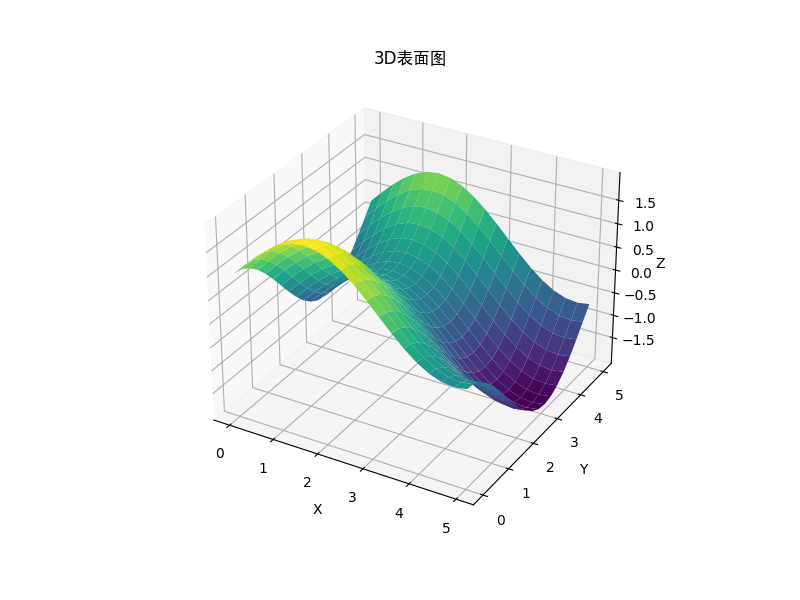

In [9]:
%matplotlib ipympl
fig = plt.figure(figsize=(8, 6), dpi=100)
ax = fig.add_subplot(projection="3d")

ax.plot_surface(xx, yy, z, cmap="viridis")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z", labelpad=-1)
ax.set_title("3D表面图")
plt.show()

In [10]:
%matplotlib inline

# Jupyter 的使用

代码、文档、可视化一体！

![demo](https://docs.jupyter.org/en/latest/_images/jupyterlab.png)

Jupyter Notebook 和 JupyterLab 是两个常用的 Jupyter 用户界面。Jupyter Notebook 更传统一些，它的界面简单，功能会略少一些。但从 7.0 版本开始，Jupyter Notebook 开始基于 JupyterLab 开发，可以享受到 JupyterLab 上的很多功能，包括调试器（debugger）、安装大量插件等等。

当然如果你喜欢的话，也可以在 VS Code 或者 PyCharm 里面用 Notebook，效果上没有很大区别

一些好用的插件：
- `jupyterlab-language-pack-zh-CN`：中文支持。安装完成后在 "Settings" -> "Language" 选择中文即可
- `jupyterlab-git`：在 JupyterLab 中使用 Git 管理你的代码
- `jupyterlab-code-formatter`：一键格式化代码，让你的代码更好看。需要安装 `black` 和 `isort` 库
- `jupyter-lab-lsp`：在 JupyterLab 中增加更多的代码补全和提示。需要安装 `jedi-language-server` 库